In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.decomposition import PCA,TruncatedSVD, NMF
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering
from kmodes.kmodes import KModes

In [2]:
customers_data = pd.read_csv('/Users/fabiobisognin/Desktop/olist_customers_dataset.csv.zip')
order_items_data = pd.read_csv('/Users/fabiobisognin/Desktop/olist_order_items_dataset.csv.zip')
products_data = pd.read_csv('/Users/fabiobisognin/Desktop/olist_products_dataset.csv.zip')
translation_data = pd.read_csv('/Users/fabiobisognin/Desktop/product_category_name_translation.csv')
orders_data = pd.read_csv('/Users/fabiobisognin/Desktop/olist_orders_dataset.csv.zip')
trasaction_data= pd.read_csv('/Users/fabiobisognin/Desktop/olist_order_payments_dataset.csv.zip')

CAMBIO NOMBRE DE CATEGORÍAS A INGLÉS

In [3]:
category_translations = dict(zip(translation_data['product_category_name'],translation_data['product_category_name_english']))
products_data = products_data.replace({'product_category_name':category_translations})


JUNTO LA DATA INCLUYENDO SOLO LO QUE NECESITO

In [4]:
category= products_data[['product_id', 'product_category_name']]

In [5]:
order_items_data

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [6]:

segment_data = pd.merge(customers_data, orders_data, on='customer_id', how='outer')
segment_data = pd.merge(segment_data, trasaction_data, on='order_id', how='outer')
segment_data = pd.merge(segment_data, order_items_data, on='order_id', how='outer')
data = pd.merge(segment_data, category, on='product_id', how='outer')




In [7]:
data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,credit_card,1.0,275.79,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,68030,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,...,credit_card,1.0,275.79,2.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,112.99,24.90,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,92480,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,...,credit_card,7.0,140.61,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,124.99,15.62,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,25931,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,...,credit_card,10.0,137.58,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,106.99,30.59,office_furniture
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118429,da37711b17efd5f2539e8196ab215f04,5f2971f9805e3ccb030226e30c8e8390,4313,sao paulo,SP,c8203bb57639618630affac9e8e923dd,delivered,2017-03-27 23:04:18,2017-03-27 23:23:38,2017-03-28 14:18:59,...,credit_card,1.0,30.95,1.0,aea06073397f809424f946979354c9f0,f45122a9ab94eb4f3f8953578bc0c560,2017-04-02 23:23:38,19.99,10.96,pet_shop
118430,184e0c2cfc746789643521df0e9ff904,c64ede6d0ae8901b1b6fb03528c1b7e6,68660,sao miguel do guama,PA,45b3000bcd10464ac178f32cd783fc83,delivered,2017-12-07 23:55:46,2017-12-09 23:50:32,2017-12-11 20:29:02,...,credit_card,4.0,304.11,1.0,bbf975bffd2ae9ee52f513ae5c8a4b27,04aba03279157f6d4e0fe8ccaf21963c,2017-12-13 23:50:32,250.00,54.11,health_beauty
118431,821a7275a08f32975caceff2e08ea262,046470763123d3d6364f89095b4e47ab,5734,sao paulo,SP,49645a8902c1ba980836b7bff991d69f,delivered,2018-04-04 17:50:52,2018-04-04 18:08:41,2018-04-05 16:36:49,...,credit_card,3.0,92.36,1.0,f6e0a9ce8a6e91c3a0ca2d3005911d20,cab85505710c7cb9b720bceb52b01cee,2018-04-10 18:08:41,84.90,7.46,fashion_bags_accessories
118432,1ed0c832c2dd99570a59260e71768bdf,82d46759af0369aad49084bacf85a6c3,37610,bom repouso,MG,51c6d2f460589fa7b65f2da51e860206,delivered,2017-11-14 12:04:09,2017-11-14 12:15:25,2017-11-27 20:44:47,...,credit_card,5.0,167.79,1.0,c98bf47f7bea8f3aee82fa023786b8a1,51a04a8a6bdcb23deccc82b0b80742cf,2017-11-24 12:15:25,167.99,31.93,electronics


In [8]:
categ={'agro_industry_and_commerce':'outdoor',
       'air_conditioning':'car',
       'art':'home',
       'arts_and_craftmanship':'home',
       'audio':'car',
       'cat_auto':'car',
       'baby':'baby',
       'bed_bath_table':'home',
       'books_general_interest':'books',
       'books_imported':'books',
       'books_technical':'books',
       'cds_dvds_musicals':'electr',
       'christmas_supplies':'home',
       'cine_photo':'other',
       'computers':'computer',
       'computers_accessories':'computer',
       'consoles_games':'game',
       'construction_tools_construction':'outdoor',
       'construction_tools_lights':'outdoor',
       'construction_tools_safety':'outdoor',
       'cool_stuff':'cool',
       'costruction_tools_garden':'outdoor',
       'costruction_tools_tools':'outdoor',
       'diapers_and_hygiene':'health',
       'drinks':'food',
       'dvds_blu_ray':'electr',
       'electronics':'electr',
       'fashio_female_clothing':'apparel',
       'fashion_bags_accessories':'apparel',
       'fashion_childrens_clothes':'apparel',
       'fashion_male_clothing':'apparel',
       'fashion_shoes':'apparel',
       'fashion_sport':'sport',
       'fashion_underwear_beach':'apparel',
       'fixed_telephony':'home',
       'flowers':'home',
       'food':'food',
       'food_drink':'food',
       'furniture_bedroom':'home',
       'furniture_decor':'home',
       'furniture_living_room':'home',
       'furniture_mattress_and_upholstery':'home',
       'garden_tools':'home',
       'health_beauty':'health',
       'home_appliances':'home',
       'home_appliances_2':'home',
       'home_comfort_2':'home',
       'home_confort':'home',
       'home_construction':'home',
       'housewares':'home',
       'industry_commerce_and_business':'office',
       'kitchen_dining_laundry_garden_furniture':'home',
       'la_cuisine':'home',
       'luggage_accessories':'outdoor',
       'market_place':'other',
       'music':'other',
       'musical_instruments':'other',
       'office_furniture':'office',
       'party_supplies':'other',
       'pc_gamer':'computer',
       'perfumery':'health',
       'pet_shop':'other',
       'portateis_cozinha_e_preparadores_de_alimentos':'food',
       'security_and_services':'home',
       'signaling_and_security':'home',
       'small_appliances':'other',
       'small_appliances_home_oven_and_coffee':'home',
       'sports_leisure':'sport',
       'stationery':'office',
       'tablets_printing_image':'other',
       'telephony':'telephony',
       'toys':'baby',
       'watches_gifts':'gift'}

In [9]:
brazil_area={'PA':'norte',
'PB': 'noreste',
'PR':'sur',
'PE':'noreste',
'PI':'noreste',
'RJ':'sureste',
'RN':'noreste',
'RS':'sur',
'RO':'norte',
'RR':'norte',
'SC':'sur',
'SP':'sureste',
'SE':'noreste',
'TO':'norte',
'BA': 'noreste',
'CE': 'noreste',
'DF': 'centro',
'ES':'sureste',
'GO':'centro',
'MA':'noreste',
'MT':'centro',
'MS':'centro',
'MG':'sureste',
'AC':'norte',
'AL':'noreste',
'AP':'norte',
'AM':'norte'}

In [10]:

#data=df[['customer_unique_id','customer_state', 'payment_type']]


In [11]:
data=data.replace({'product_category_name': categ})


In [12]:
data=data.replace({'customer_state': brazil_area})

In [13]:
data['order']=1

In [14]:
df=data
df=df[['customer_unique_id', 'order', 'customer_state', 'payment_value', 'payment_type', 'price', 'product_category_name']]
df

,customer_unique_id,order,customer_state,payment_value,payment_type,price,product_category_name
0,861eff4711a542e4b93843c6dd7febb0,1,sureste,146.87,credit_card,124.99,office
1,9eae34bbd3a474ec5d07949ca7de67c0,1,norte,275.79,credit_card,112.99,office
2,9eae34bbd3a474ec5d07949ca7de67c0,1,norte,275.79,credit_card,112.99,office
3,3c799d181c34d51f6d44bbbc563024db,1,sur,140.61,credit_card,124.99,office
4,23397e992b09769faf5e66f9e171a241,1,sureste,137.58,credit_card,106.99,office
...,...,...,...,...,...,...,...
118429,5f2971f9805e3ccb030226e30c8e8390,1,sureste,30.95,credit_card,19.99,other
118430,c64ede6d0ae8901b1b6fb03528c1b7e6,1,norte,304.11,credit_card,250.00,health
118431,046470763123d3d6364f89095b4e47ab,1,sureste,92.36,credit_card,84.90,apparel
118432,82d46759af0369aad49084bacf85a6c3,1,sureste,167.79,credit_card,167.99,electr


In [15]:

dat=pd.get_dummies(df, columns=['payment_type', 'product_category_name', 'customer_state'], prefix = ['pay', '', ''])


In [16]:
#cu_pur=df.groupby('customer_unique_id').agg({'price':'sum', 'order':'sum',

In [17]:
len(dat.columns)

32

In [18]:
dat=dat.drop(['price'], axis=1)

In [19]:
dat.columns

Index(['customer_unique_id', 'order', 'payment_value', 'pay_boleto',
       'pay_credit_card', 'pay_debit_card', 'pay_not_defined', 'pay_voucher',
       '_apparel', '_auto', '_baby', '_books', '_car', '_computer', '_cool',
       '_electr', '_food', '_game', '_gift', '_health', '_home', '_office',
       '_other', '_outdoor', '_sport', '_telephony', '_centro', '_noreste',
       '_norte', '_sur', '_sureste'],
      dtype='object')

In [20]:
dat=dat.groupby('customer_unique_id').agg({'payment_value':'mean', 'pay_boleto':'sum',
       'pay_credit_card':'sum', 'pay_debit_card':'sum', 'pay_voucher':'sum', '_apparel':'sum', '_auto':'sum',
       '_baby':'sum', '_books':'sum', '_car':'sum', '_computer':'sum', '_cool':'sum', '_electr':'sum',
       '_food':'sum', '_game':'sum', '_gift':'sum', '_health':'sum', '_home':'sum', '_office':'sum', '_other':'sum',
       '_outdoor':'sum', '_sport':'sum', '_telephony':'sum', '_centro':'sum', '_noreste':'sum', '_norte':'sum', '_sur':'sum',
       '_sureste':'sum'})
                                         

In [21]:
dat

,payment_value,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,_apparel,_auto,_baby,_books,_car,...,_office,_other,_outdoor,_sport,_telephony,_centro,_noreste,_norte,_sur,_sureste
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0000f46a3911fa3c0805444483337064,86.22,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
0000f6ccb0745a6a4b88665a16c9f078,43.62,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
0004aac84e0df4da2b147fca70cf8255,196.89,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,84.58,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
ffff371b4d645b6ecea244b27531430a,112.46,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [22]:
#a, b = 0, 1
#x, y = dat.payment_value.min(), dat.payment_value.max()
#dat['payment_value'] = (dat.payment_value - x) / (y - x) * (b - a) + a

In [23]:
dat

,payment_value,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,_apparel,_auto,_baby,_books,_car,...,_office,_other,_outdoor,_sport,_telephony,_centro,_noreste,_norte,_sur,_sureste
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
0000f46a3911fa3c0805444483337064,86.22,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
0000f6ccb0745a6a4b88665a16c9f078,43.62,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
0004aac84e0df4da2b147fca70cf8255,196.89,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
fffea47cd6d3cc0a88bd621562a9d061,84.58,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
ffff371b4d645b6ecea244b27531430a,112.46,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [24]:
dat=dat.astype('float')
dat

,payment_value,pay_boleto,pay_credit_card,pay_debit_card,pay_voucher,_apparel,_auto,_baby,_books,_car,...,_office,_other,_outdoor,_sport,_telephony,_centro,_noreste,_norte,_sur,_sureste
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,141.90,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0000f46a3911fa3c0805444483337064,86.22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,43.62,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,196.89,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,84.58,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,112.46,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
dat = dat.dropna(how='any',axis=0) 

KMEANS

In [26]:
from sklearn.cluster import KMeans

In [27]:
cols= dat.columns
cols

Index(['payment_value', 'pay_boleto', 'pay_credit_card', 'pay_debit_card',
       'pay_voucher', '_apparel', '_auto', '_baby', '_books', '_car',
       '_computer', '_cool', '_electr', '_food', '_game', '_gift', '_health',
       '_home', '_office', '_other', '_outdoor', '_sport', '_telephony',
       '_centro', '_noreste', '_norte', '_sur', '_sureste'],
      dtype='object')

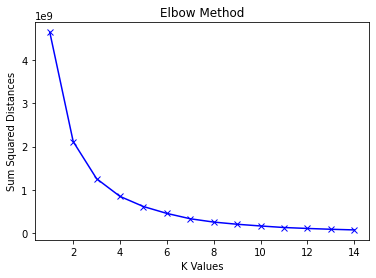

In [28]:
K = range(1,15)
sum_squared_distances = []
for k in K:
  model = KMeans(n_clusters=k).fit(dat[cols])
  sum_squared_distances.append(model.inertia_)
plt.plot(K, sum_squared_distances, "bx-")
plt.xlabel("K Values")
plt.ylabel("Sum Squared Distances")
plt.title("Elbow Method")
plt.show()

In [62]:
kmeans = KMeans(n_clusters=5)
cu_clusters = kmeans.fit(dat[cols])

In [63]:
cu_clusters.cluster_centers_

array([[ 8.44943245e+01,  2.34259913e-01,  8.48271483e-01,
         1.78778044e-02,  8.41399746e-02,  3.37096091e-02,
         4.23310286e-02,  7.92295753e-02,  1.11753916e-02,
         5.67235784e-03,  7.45731621e-02,  3.55157330e-02,
         3.65175674e-02,  1.49005221e-02,  1.24735431e-02,
         4.89346691e-02,  1.38224919e-01,  3.68011853e-01,
         3.98052773e-02,  3.85917878e-02,  2.82912375e-02,
         9.22957528e-02,  5.69634542e-02,  6.53873289e-02,
         9.73895866e-02,  1.69606321e-02,  1.65937632e-01,
         8.38916326e-01],
       [ 1.54455358e+03,  3.30434783e-01,  1.19006211e+00,
         1.36645963e-02,  9.93788820e-03,  3.72670807e-03,
         1.13043478e-01,  6.95652174e-02,  2.94902991e-17,
         1.86335404e-02,  2.67080745e-01,  2.23602484e-02,
         1.61490683e-02,  1.24223602e-03,  3.72670807e-03,
         1.21739130e-01,  1.25465839e-01,  3.13043478e-01,
         1.15527950e-01,  1.04347826e-01,  9.19254658e-02,
         6.21118012e-02,  4.72

In [64]:
preds = cu_clusters.fit_predict(dat[cols])

In [65]:
dat['cluster']=preds

<ipython-input-65-54554af9c59d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['cluster']=preds


In [89]:
clust_1= dat[dat['cluster']==1]
clust_2= dat[dat['cluster']==2]
clust_3= dat[dat['cluster']==3]
clust_4= dat[dat['cluster']==4]
clust_5= dat[dat['cluster']==5]


In [90]:
stateclust_1 = clust_1[[
'_norte',
'_noreste',
'_centro',
'_sureste',
'_sur']].idxmax(axis=1)
stateclust_1.value_counts()

_sureste    459
_noreste    125
_sur        123
_centro      58
_norte       40
dtype: int64

In [91]:
stateclust_2 = clust_2[[
'_norte',
'_noreste',
'_centro',
'_sureste',
'_sur']].idxmax(axis=1)
stateclust_2.value_counts()

_sureste    2175
_noreste     536
_sur         496
_centro      258
_norte       120
dtype: int64

In [92]:
stateclust_3 = clust_3[[
'_norte',
'_noreste',
'_centro',
'_sureste',
'_sur']].idxmax(axis=1)
stateclust_3.value_counts()

_sureste    13277
_sur         3004
_noreste     2545
_centro      1330
_norte        583
dtype: int64

In [70]:
stateclust_4 = clust_4[[
'_norte',
'_noreste',
'_centro',
'_sureste',
'_sur']].idxmax(axis=1)
stateclust_4.value_counts()

_sureste    44
_noreste    13
_sur        11
_centro      9
_norte       2
dtype: int64

In [71]:
stateclust_5 = clust_5[[
'_norte',
'_noreste',
'_centro',
'_sureste',
'_sur']].idxmax(axis=1)
stateclust_5.value_counts()

Series([], dtype: int64)

In [72]:
stateclust_6 = clust_6[[
'_norte',
'_noreste',
'_centro',
'_sureste',
'_sur']].idxmax(axis=1)
stateclust_6.value_counts()

Series([], dtype: int64)

In [73]:
payclust_1 = clust_1[['pay_boleto', 'pay_credit_card','pay_debit_card', 'pay_voucher']].idxmax(axis=1)
payclust_1.value_counts()

pay_credit_card    668
pay_boleto         121
pay_debit_card      11
pay_voucher          5
dtype: int64

In [74]:
payclust_2 = clust_2[['pay_boleto', 'pay_credit_card','pay_debit_card', 'pay_voucher']].idxmax(axis=1)
payclust_2.value_counts()

pay_credit_card    2956
pay_boleto          584
pay_debit_card       30
pay_voucher          15
dtype: int64

In [75]:
payclust_3 = clust_3[['pay_boleto', 'pay_credit_card','pay_debit_card', 'pay_voucher']].idxmax(axis=1)
payclust_3.value_counts()

pay_credit_card    16753
pay_boleto          3561
pay_debit_card       281
pay_voucher          144
dtype: int64

In [76]:
payclust_4 = clust_4[['pay_boleto', 'pay_credit_card','pay_debit_card', 'pay_voucher']].idxmax(axis=1)
payclust_4.value_counts()

pay_credit_card    56
pay_boleto         20
pay_debit_card      2
pay_voucher         1
dtype: int64

In [77]:
payclust_5 = clust_5[['pay_boleto', 'pay_credit_card','pay_debit_card', 'pay_voucher']].idxmax(axis=1)
payclust_5.value_counts()

Series([], dtype: int64)

In [78]:
payclust_6 = clust_6[['pay_boleto', 'pay_credit_card','pay_debit_card', 'pay_voucher']].idxmax(axis=1)
payclust_6.value_counts()

Series([], dtype: int64)

In [79]:
catclust_1= clust_1[['_apparel', '_auto','_baby', '_books', '_car', '_computer', '_cool', '_electr',
       '_food', '_game', '_gift', '_health', '_home', '_office', '_other',
       '_outdoor', '_sport', '_telephony']].idxmax(axis=1)

catclust_1.value_counts()

_home         156
_computer     132
_gift          83
_health        82
_other         75
_auto          54
_outdoor       45
_sport         42
_baby          37
_apparel       33
_office        22
_telephony     14
_cool          12
_electr         8
_car            6
_game           3
_food           1
dtype: int64

In [80]:
catclust_2= clust_2[['_apparel', '_auto','_baby', '_books', '_car', '_computer', '_cool', '_electr',
       '_food', '_game', '_gift', '_health', '_home', '_office', '_other',
       '_outdoor', '_sport', '_telephony']].idxmax(axis=1)

catclust_2.value_counts()

_home         715
_gift         517
_health       439
_computer     287
_baby         235
_cool         228
_other        205
_auto         170
_sport        164
_outdoor      140
_office       133
_telephony     80
_apparel       80
_game          67
_car           64
_electr        29
_books         23
_food           9
dtype: int64

In [81]:
catclust_3= clust_3[['_apparel', '_auto','_baby', '_books', '_car', '_computer', '_cool', '_electr',
       '_food', '_game', '_gift', '_health', '_home', '_office', '_other',
       '_outdoor', '_sport', '_telephony']].idxmax(axis=1)

catclust_3.value_counts()

_home         5724
_health       2536
_gift         1806
_computer     1597
_sport        1564
_baby         1313
_office       1094
_cool         1073
_auto          894
_other         711
_outdoor       696
_apparel       609
_telephony     425
_electr        217
_game          191
_car           157
_food           76
_books          56
dtype: int64

In [82]:
catclust_4= clust_4[['_apparel', '_auto','_baby', '_books', '_car', '_computer', '_cool', '_electr',
       '_food', '_game', '_gift', '_health', '_home', '_office', '_other',
       '_outdoor', '_sport', '_telephony']].idxmax(axis=1)

catclust_4.value_counts()

_computer    22
_home        17
_other        7
_sport        5
_gift         5
_cool         5
_health       4
_electr       3
_apparel      3
_outdoor      3
_game         2
_food         1
_office       1
_baby         1
dtype: int64

In [83]:
catclust_5= clust_5[['_apparel', '_auto','_baby', '_books', '_car', '_computer', '_cool', '_electr',
       '_food', '_game', '_gift', '_health', '_home', '_office', '_other',
       '_outdoor', '_sport', '_telephony']].idxmax(axis=1)

catclust_5.value_counts()

Series([], dtype: int64)

In [84]:
catclust_6= clust_6[['_apparel', '_auto','_baby', '_books', '_car', '_computer', '_cool', '_electr',
       '_food', '_game', '_gift', '_health', '_home', '_office', '_other',
       '_outdoor', '_sport', '_telephony']].idxmax(axis=1)

catclust_6.value_counts()

Series([], dtype: int64)

In [86]:
value_1= clust_1[['payment_value']]
value_1.mean()

payment_value    1544.553578
dtype: float64

In [85]:
value_2= clust_2[['payment_value']]
value_2.mean()

payment_value    680.364524
dtype: float64

In [87]:
value_3= clust_3[['payment_value']]
value_3.mean()

payment_value    256.043648
dtype: float64

In [88]:
value_4= clust_4[['payment_value']]
value_4.mean()

payment_value    3550.966139
dtype: float64

In [ ]:
payclust_2 = clust_2[['pay_boleto', 'pay_credit_card','pay_debit_card', 'pay_voucher']].idxmax(axis=1)
payclust_2.value_counts()